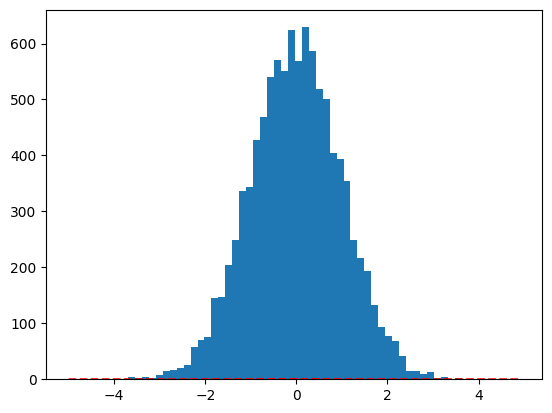

In [71]:
#Generate a Guauss-distributed random number with specified mean and width using the Box-Muller method
#Input: mean, width
#Output: random number
import math 
import random
import numpy
import matplotlib.pyplot as plt

def BoxMuller(mean,width):
    #Generate two uniform random numbers
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    #Transform to a Gaussian-distributed random number
    z = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    #Scale and shift to the desired mean and width
    x = mean + width*z
    return x

#Create an ensemble of Guassian-distributed random numbers and show that they match the desired function shape
#Input: mean, width, number of random numbers
#Output: histogram of random numbers
def BoxMullerEnsemble(mean,width,N):
    #Create an empty list to store the random numbers
    x = []
    #Generate N random numbers
    for i in range(N):
        x.append(BoxMuller(mean,width))
    #Plot the histogram
    plt.hist(x,50)
    #Add the desired function shape to the plot
    y = numpy.arange(-5,5,0.1)
    plt.plot(y,numpy.exp(-y**2/2)/math.sqrt(2*math.pi),'r--')
    plt.show()

BoxMullerEnsemble(0,1,10000)

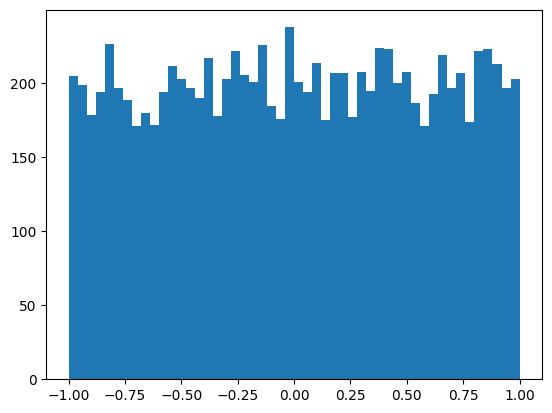

In [72]:
#plot uniform distribution

def uniform(mean,width,N):
    x = []
    for i in range(N):
        x.append(random.uniform(mean-width,mean+width))
    plt.hist(x,50)
    plt.show()

uniform(0,1,10000)

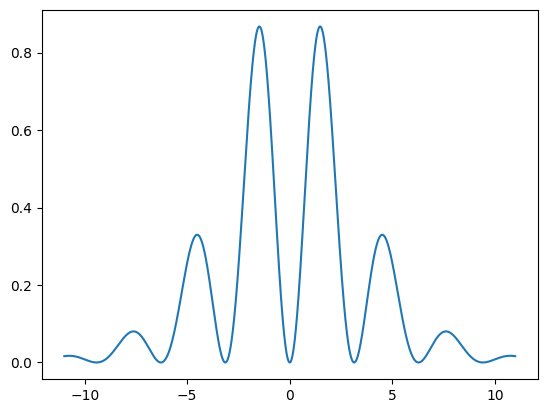

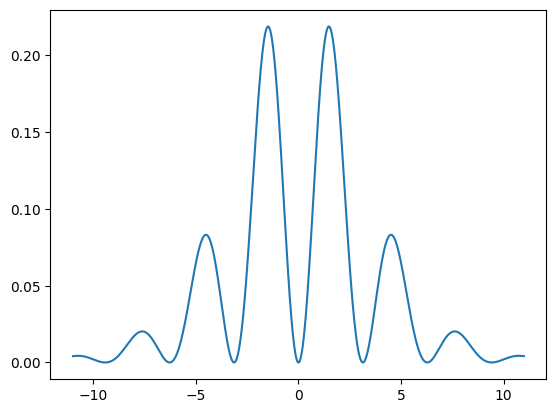

In [73]:
#create an arbitrary function shape for later use with multple peaks and valleys and normalize it
xmin = -7*math.pi/2
xmax = 7*math.pi/2
x = numpy.arange(xmin,xmax,0.01)
y = numpy.sin(x)**2/numpy.cosh(x/4)**2
plt.plot(x,y)
plt.show()

#normalize the function shape
norm = numpy.trapz(y,x)

plt.plot(x,y/norm)
plt.show()

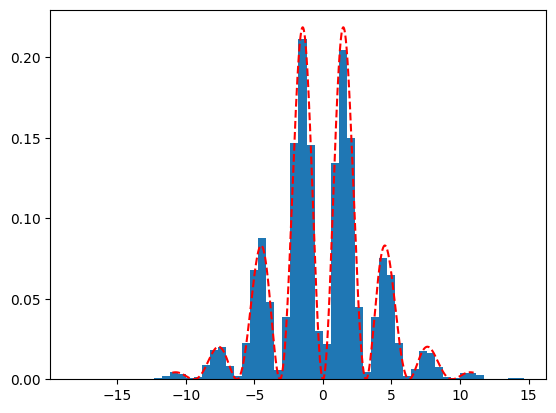

In [84]:
#function to create the next Metropolis value
def Metropolis(x):
    #we will use the Box-Muller method to generate a new gaussian value
    xPrime = BoxMuller(x,1)
    px = numpy.sin(x)**2/numpy.cosh(x/4)**2
    pxPrime = numpy.sin(xPrime)**2/numpy.cosh(xPrime/4)**2
    if random.uniform(0,1)*px < pxPrime:
        return xPrime
    else: 
        return x

#create a chain of Metropolis values distributed according to the probability distribution p
xValue = 0
trials = 100000
bins = 56
width = 1
xMetro = []
for i in range(trials):
    xValue = Metropolis(xValue)
    xMetro.append(xValue)

#normalize the histogram
plt.hist(xMetro,bins,density=True)
plt.plot(x,y/norm,'r--')
plt.show()

